In [1]:
student_name= 'aditya agarwal'
student_id= '46184821'

## Portfolio Part 4




The header of the csv file is shown below. 

| year | country name | GDP (current US$)| 	GDP per capita (current US$) |	GDP growth (annual %)| 	Imports of goods and services (% of GDP) |	Exports of goods and services (% of GDP) |	Total reserves (includes gold, current US$) |	Inflation, consumer prices (annual%) |	TotalPopulation |	Population growth (annual %)| 	Life expectancy at birth, total (years)
  

In [2]:
# importing all libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.neighbors import KNeighborsRegressor


import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data file (.csv format)
df = pd.read_csv('indianEco.csv')

# printing the first ten rows of the dataset
df.head(10)

,Year,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)",TotalPopulation,Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,India,3.702988e+10,82,0.00,6.83,4.46,674536630.9,1.78,445954579,2.31,41.13
1,1961,India,3.923244e+10,85,3.72,5.96,4.30,666357094.9,1.70,456351876,2.33,41.74
2,1962,India,4.216148e+10,90,2.93,6.03,4.17,512791844.0,3.63,467024193,2.34,42.34
3,1963,India,4.842192e+10,101,5.99,5.91,4.28,607862500.4,2.95,477933619,2.34,42.94
4,1964,India,5.648029e+10,116,7.45,5.69,3.73,499145125.8,13.36,489059309,2.33,43.57
5,1965,India,5.955485e+10,119,-2.64,5.21,3.31,600850886.2,9.47,500114346,2.26,44.20
6,1966,India,4.586546e+10,90,-0.06,6.67,4.14,609694584.5,10.80,510992617,2.18,44.84
7,1967,India,5.013494e+10,96,7.83,5.95,4.03,663764119.8,13.06,521987069,2.15,45.47
8,1968,India,5.308546e+10,100,3.39,4.94,4.04,730352744.9,3.24,533431909,2.19,46.10
9,1969,India,5.844800e+10,108,6.54,4.03,3.71,927764119.8,-0.58,545314670,2.23,46.75


In [4]:
# displaying the dataset and its length
df

,Year,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)",TotalPopulation,Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,India,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,India,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,India,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,India,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,India,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016,India,2.290000e+12,1733,8.26,20.92,19.16,3.620000e+11,4.95,1338636340,1.19,68.67
57,2017,India,2.650000e+12,1981,6.80,21.95,18.79,4.130000e+11,3.33,1354195680,1.16,68.97
58,2018,India,2.700000e+12,1997,6.53,23.69,19.93,3.990000e+11,3.94,1369003306,1.09,69.27
59,2019,India,2.830000e+12,2101,4.04,21.27,18.69,4.630000e+11,3.73,1383112050,1.03,69.50


# Exploring the data

In [5]:
# displaying the info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           61 non-null     int64  
 1   Country Name                                   61 non-null     object 
 2   GDP (current US$)                              61 non-null     float64
 3    GDP per capita (current US$)                  61 non-null     int64  
 4   GDP growth (annual %)                          61 non-null     float64
 5   Imports of goods and services (% of GDP)       61 non-null     float64
 6   Exports of goods and services (% of GDP)       61 non-null     float64
 7    Total reserves (includes gold, current US$)   61 non-null     float64
 8   Inflation, consumer prices (annual %)          61 non-null     float64
 9   TotalPopulation                                61 non-nu

In [6]:
# description of the dataframe
df.describe()

,Year,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)",TotalPopulation,Population growth (annual %),"Life expectancy at birth, total (years)"
count,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,61.000000
mean,1990.000000,6.583962e+11,575.557377,4.938197,12.746393,10.885574,9.801839e+10,7.413279,8.913946e+08,1.927705,57.146230
std,17.752934,8.127562e+11,584.079062,3.344891,8.155110,7.060458,1.496772e+11,4.940153,2.974496e+08,0.419024,8.459559
min,1960.000000,3.702988e+10,82.000000,-7.250000,3.710000,3.310000,4.991451e+08,-7.630000,4.459546e+08,0.960000,41.130000
25%,1975.000000,9.952590e+10,161.000000,3.720000,6.590000,5.200000,2.324650e+09,4.010000,6.235242e+08,1.620000,50.630000
50%,1990.000000,2.880000e+11,340.000000,5.530000,8.570000,7.050000,1.151174e+10,6.670000,8.704522e+08,2.150000,57.660000
75%,2005.000000,8.200000e+11,715.000000,7.450000,19.640000,18.690000,1.380000e+11,10.020000,1.154639e+09,2.260000,64.310000
max,2020.000000,2.830000e+12,2101.000000,9.630000,31.260000,25.430000,5.900000e+11,28.600000,1.396387e+09,2.340000,69.730000


In [7]:
# displaying the shape of the data

df.shape

(61, 12)

In [8]:
# counting the size of the data

df.count()

Year                                             61
Country Name                                     61
GDP (current US$)                                61
 GDP per capita (current US$)                    61
GDP growth (annual %)                            61
Imports of goods and services (% of GDP)         61
Exports of goods and services (% of GDP)         61
 Total reserves (includes gold, current US$)     61
Inflation, consumer prices (annual %)            61
TotalPopulation                                  61
Population growth (annual %)                     61
Life expectancy at birth, total (years)          61
dtype: int64

In [9]:
# counting the size of the data using len() function

rows = len(df.axes[0])
cols = len(df.axes[1])
print(rows)
print(cols)

61
12


In [10]:
# displaying the columns in the dataframe

df.columns

Index(['Year', 'Country Name', 'GDP (current US$) ',
       ' GDP per capita (current US$) ', 'GDP growth (annual %)',
       'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       ' Total reserves (includes gold, current US$) ',
       'Inflation, consumer prices (annual %)', 'TotalPopulation',
       'Population growth (annual %)',
       'Life expectancy at birth, total (years)'],
      dtype='object')

In [81]:
# cleaning the dataset

data_frame=df.drop(['Country Name'], axis=1)


In [82]:
data_frame.dropna()

,Year,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)",TotalPopulation,Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57
...,...,...,...,...,...,...,...,...,...,...,...
56,2016,2.290000e+12,1733,8.26,20.92,19.16,3.620000e+11,4.95,1338636340,1.19,68.67
57,2017,2.650000e+12,1981,6.80,21.95,18.79,4.130000e+11,3.33,1354195680,1.16,68.97
58,2018,2.700000e+12,1997,6.53,23.69,19.93,3.990000e+11,3.94,1369003306,1.09,69.27
59,2019,2.830000e+12,2101,4.04,21.27,18.69,4.630000e+11,3.73,1383112050,1.03,69.50


In [83]:
# identifying missing/null values 

data_frame.isnull().sum()

Year                                             0
GDP (current US$)                                0
 GDP per capita (current US$)                    0
GDP growth (annual %)                            0
Imports of goods and services (% of GDP)         0
Exports of goods and services (% of GDP)         0
 Total reserves (includes gold, current US$)     0
Inflation, consumer prices (annual %)            0
TotalPopulation                                  0
Population growth (annual %)                     0
Life expectancy at birth, total (years)          0
dtype: int64

No missing values found. Let's move on.

In [84]:
# shape of the data

print(data_frame.shape)

(61, 11)


In [85]:
# seaborn library-> count plot use for ratings, gender values, varies categories etc. [not apply for user id, timestamp, item]

#sns.countplot(x='item', y='rating', hue='gender', data=data_frame)


In [86]:
data_frame.head(15)

,Year,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)",TotalPopulation,Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57
5,1965,5.955485e+10,119,-2.64,5.21,3.31,6.008509e+08,9.47,500114346,2.26,44.20
6,1966,4.586546e+10,90,-0.06,6.67,4.14,6.096946e+08,10.80,510992617,2.18,44.84
7,1967,5.013494e+10,96,7.83,5.95,4.03,6.637641e+08,13.06,521987069,2.15,45.47
8,1968,5.308546e+10,100,3.39,4.94,4.04,7.303527e+08,3.24,533431909,2.19,46.10
9,1969,5.844800e+10,108,6.54,4.03,3.71,9.277641e+08,-0.58,545314670,2.23,46.75


# Correlation

In [87]:
# displaying the correlation for different features in the dataframe
# df.corr()

data_frame.corr()

,Year,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)",TotalPopulation,Population growth (annual %),"Life expectancy at birth, total (years)"
Year,1.000000,0.846676,0.865053,0.278268,0.873956,0.909573,0.814696,-0.037177,0.997523,-0.907750,0.995487
GDP (current US$),0.846676,1.000000,0.998620,0.118954,0.836210,0.848055,0.980421,-0.105403,0.863622,-0.957579,0.804017
GDP per capita (current US$),0.865053,0.998620,1.000000,0.142764,0.853837,0.863811,0.977182,-0.091981,0.880301,-0.959680,0.825702
GDP growth (annual %),0.278268,0.118954,0.142764,1.000000,0.280289,0.269356,0.050176,0.007843,0.276103,-0.168449,0.294472
Imports of goods and services (% of GDP),0.873956,0.836210,0.853837,0.280289,1.000000,0.989499,0.841134,-0.034099,0.894541,-0.912249,0.849597
Exports of goods and services (% of GDP),0.909573,0.848055,0.863811,0.269356,0.989499,1.000000,0.851696,-0.073604,0.927934,-0.935063,0.886921
"Total reserves (includes gold, current US$)",0.814696,0.980421,0.977182,0.050176,0.841134,0.851696,1.000000,-0.108049,0.835331,-0.957051,0.767991
"Inflation, consumer prices (annual %)",-0.037177,-0.105403,-0.091981,0.007843,-0.034099,-0.073604,-0.108049,1.000000,-0.053939,0.123497,-0.014927
TotalPopulation,0.997523,0.863622,0.880301,0.276103,0.894541,0.927934,0.835331,-0.053939,1.000000,-0.928431,0.987134
Population growth (annual %),-0.907750,-0.957579,-0.959680,-0.168449,-0.912249,-0.935063,-0.957051,0.123497,-0.928431,1.000000,-0.868766


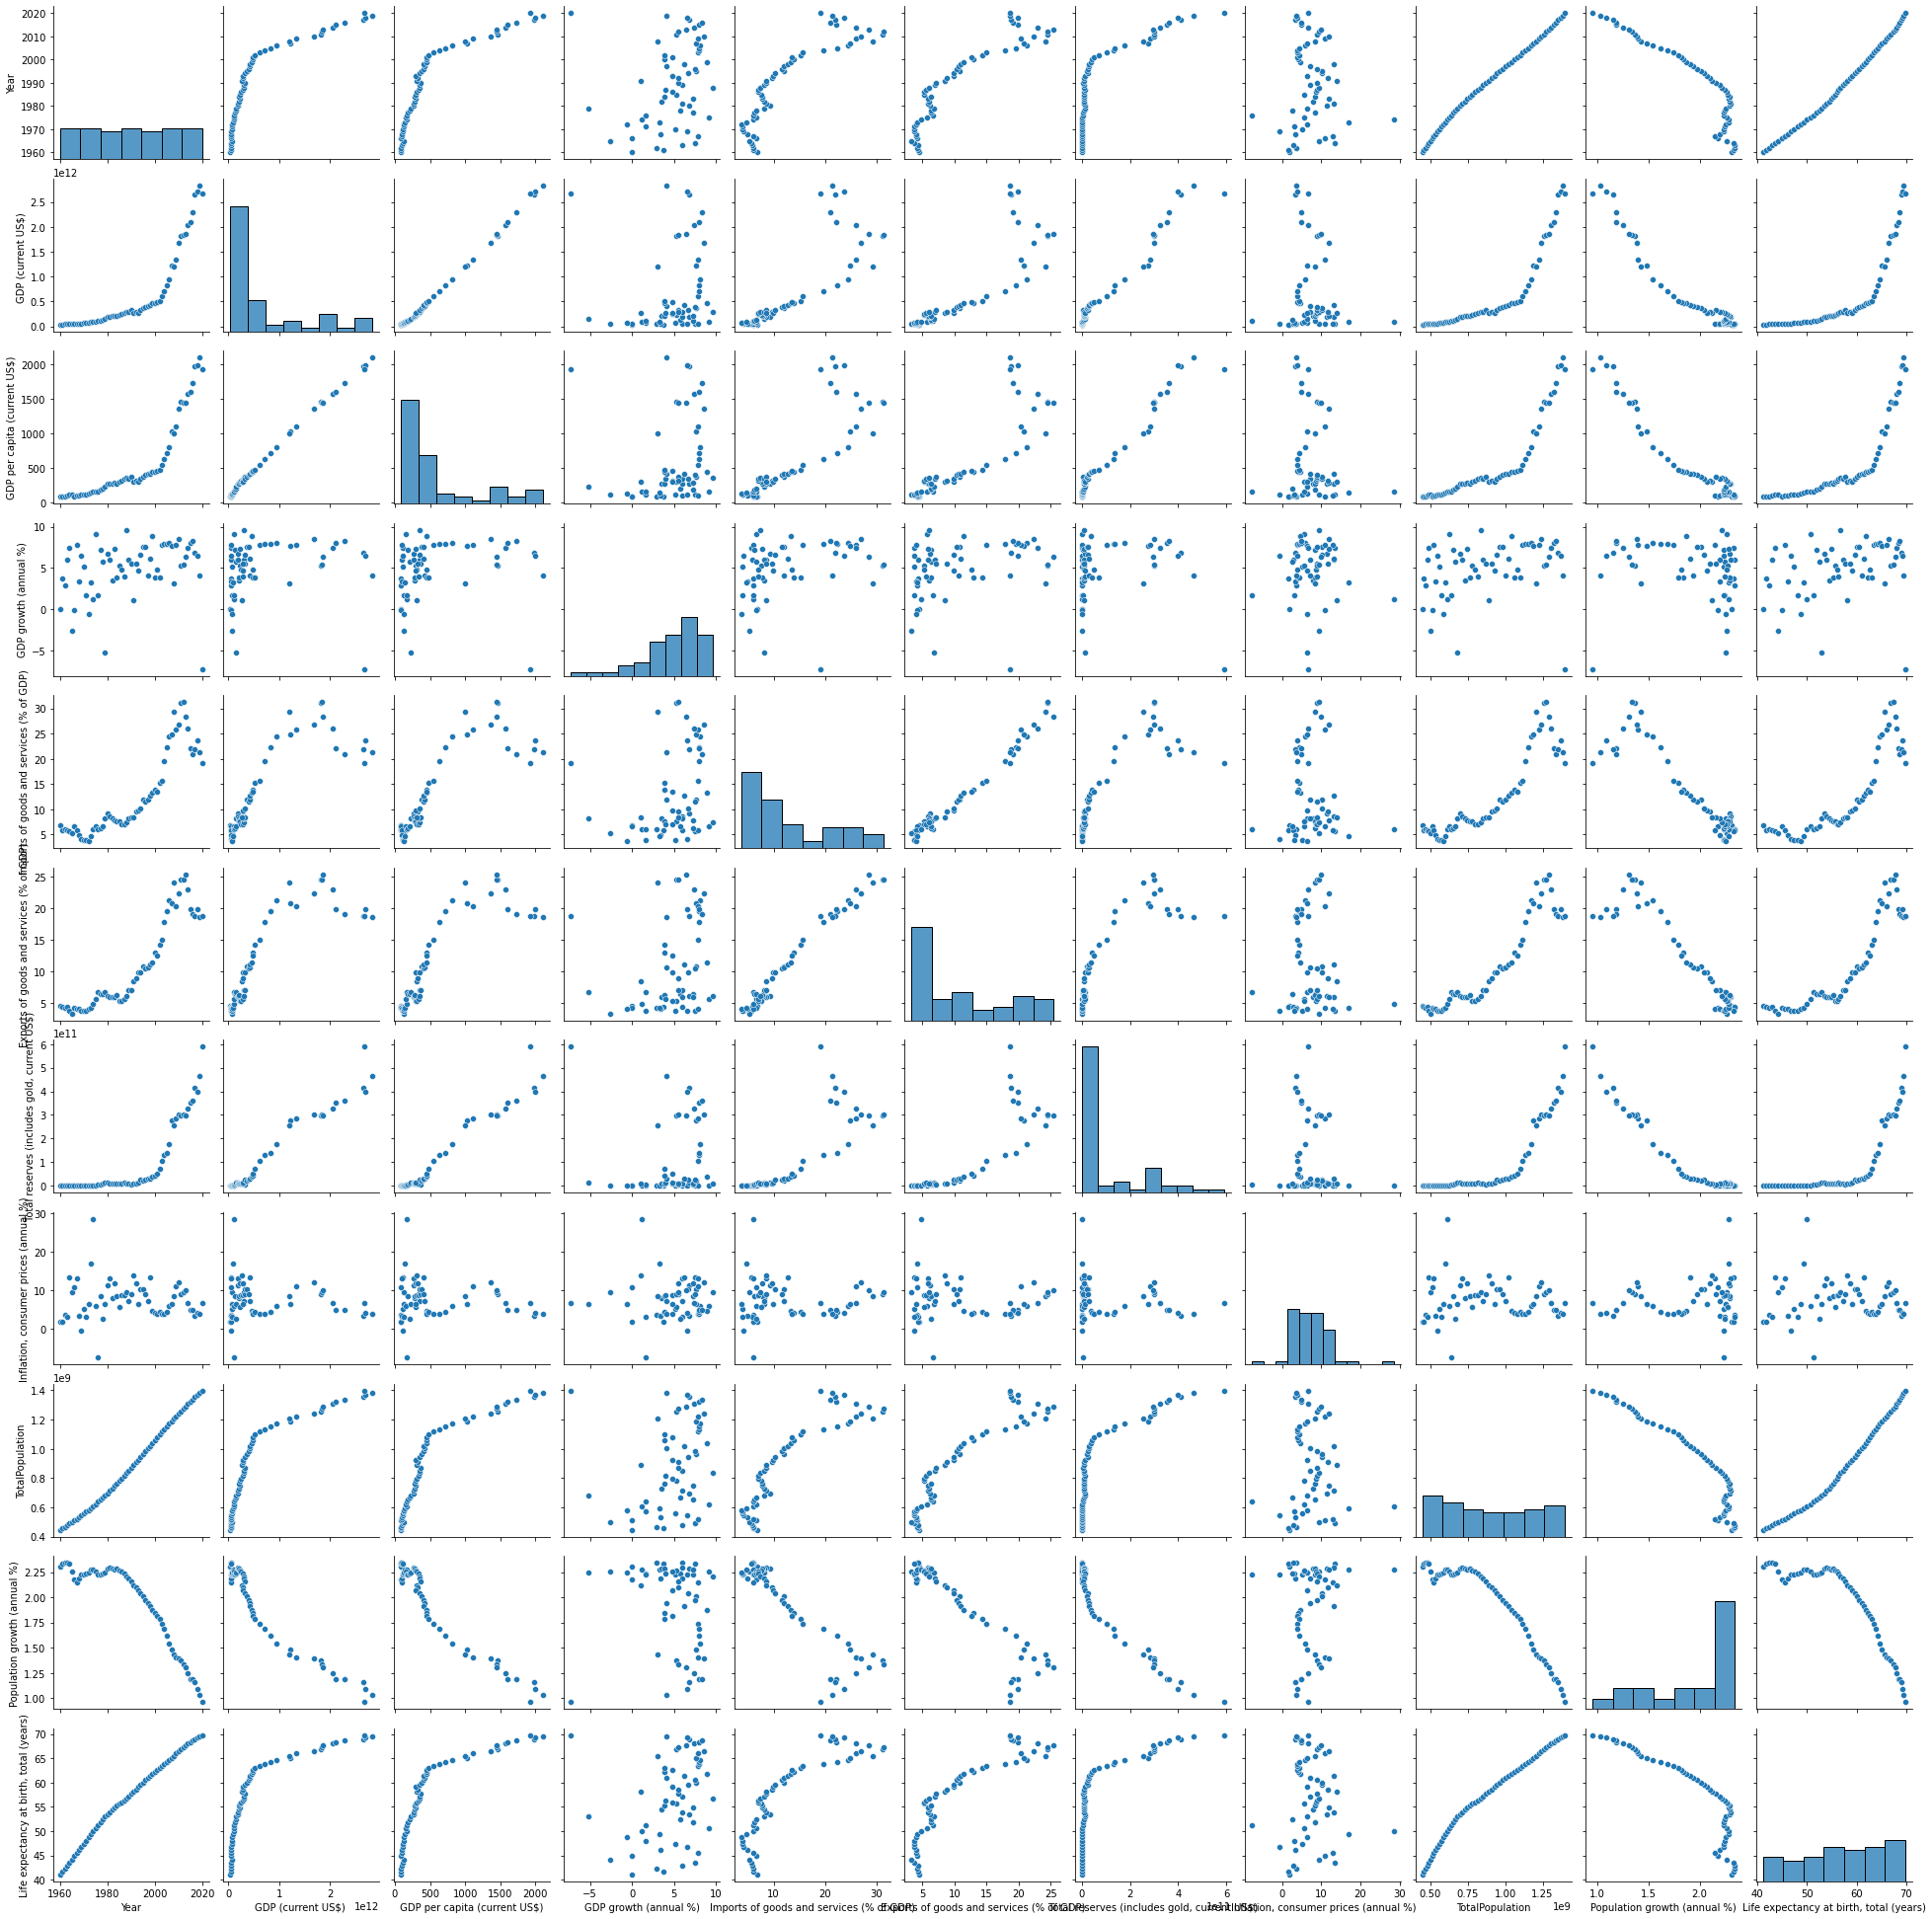

In [141]:
# displaying the correlatin for different features using pairplot

sns.pairplot(data=data_frame)



**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = O_1x + O_2$$

**Logistic regression:** log-odds of a categorical response being "true (1)" is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = O_1x + O_2$$

This is called the **logit function**.

# Split the dataset

#### Analysis
In order to prevent data leakage (when components of the training dataset leak to the response variable and influences the model fitting, creating a wrong sensation of good fit), we're spliting the data now, before any other formatting.

In [142]:
# Spliting the data into training(70%) and testing data (30%) and using random_state=42

# use any train/test(10/20/30) size 
# use the train test method to split the dataset
train, test= train_test_split(data_frame, test_size=0.3, random_state=42)

In [143]:
# printing the shape/size of the dataframes after splitting the data

print('the number of rows in training data are:', train.shape[0])
print('the number of columns in training data are:', train.shape[1])

print('')
print('')

print('the number of rows in testing data are:', test.shape[0])
print('the number of columns in testing data are:', test.shape[1])

the number of rows in training data are: 42
the number of columns in training data are: 11


the number of rows in testing data are: 19
the number of columns in testing data are: 11


In [144]:
# another way to print the shape of the training and testing data

print(f'Train: {x_train.shape, y_train.shape}  \nTest: {x_test.shape, y_test.shape}')

Train: ((42, 2), (42,))  
Test: ((19, 2), (19,))



### Removing Outliers

#### Analysis

Linear Regression is very affected by outliers, as it can interfere in the curve slope calculation.

Let's remove those using the 1.5 x IQR rule: everything above or below 1.5 times the inter-quantile range will be removed.


In [145]:
# Extract the descriptive statistics for the explanatory variables for IQR calculation

x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,42.0,1.991167e+03,1.689410e+01,1961.0,1.979250e+03,1989.5,2.004750e+03,2.020000e+03
TotalPopulation,42.0,9.082446e+08,2.859428e+08,456351876.0,6.851434e+08,861232419.0,1.150045e+09,1.396387e+09


In [146]:
# Extracting the quantiles
x_25 = x_train.describe().T.loc['Year', '25%']
x_75 = x_train.describe().T.loc['Year', '75%']
y_25 = x_train.describe().T.loc['TotalPopulation', '25%']
y_75 = x_train.describe().T.loc['TotalPopulation', '75%']


# Calculate IQRs
IQR_x = 1.5 * (x_75 - x_25)
IQR_y = 1.5 * (y_75 - y_25)






Analysis: Remove the Outliers


In [147]:
# Remove outliers from the variable 'x'


x_train = x_train.query(' Year >= (@x_25 - @IQR_x) & Year <= (@x_75 + @IQR_x) ')
y_train = y_train[x_train.index]

# Remove outliers from the variable 'y'
x_train = x_train.query(' Year >= (@y_25 - @IQR_y) & TotalPopulation<= (@y_75 + @IQR_y) ')
y_train = y_train[x_train.index]



Analysis of the results : Clean dataset


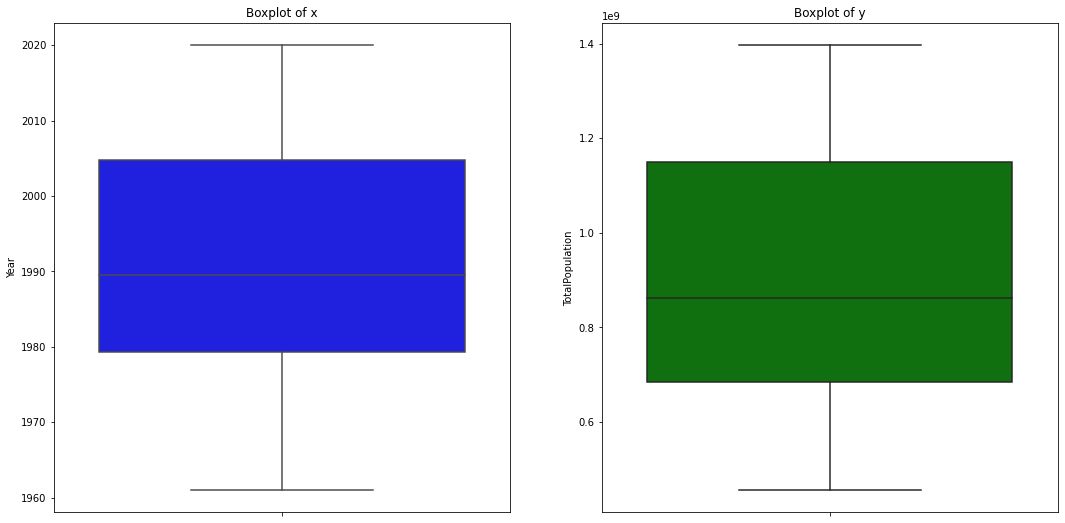

In [148]:
# setup figure
fig, ax = plt.subplots(1,2, figsize=(18,9))

# plot1
g1 = sns.boxplot(y=x_train.Year, color='blue', ax=ax[0])
g1.set_title('Boxplot of x')

# plot2
g2 = sns.boxplot(y=x_train['TotalPopulation'], color='green', ax=ax[1])
g2.set_title('Boxplot of y');



Analysis of the scatteplots now that we have removed the outliers

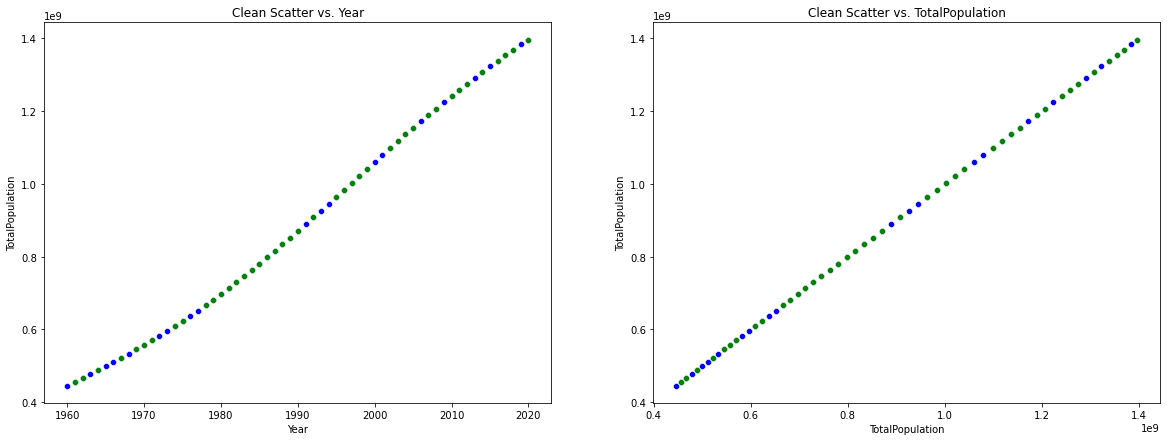

In [312]:


# setup figure
fig, ax = plt.subplots(1,2, figsize=(20,7))

for i, var in enumerate(['Year', 'TotalPopulation']):
  # Original data plots
  g= sns.scatterplot(data= df, x=var, y='TotalPopulation', color='blue', ax=ax[i])
  g.set_title(f'Original Scatter vs. {var}')


df_clean = pd.concat([x_train, y_train], axis=1)

for i, var in enumerate(['Year', 'TotalPopulation']):
  # Cleaned data plots
  g= sns.scatterplot(data= df_clean, x=var, y='TotalPopulation', color='green', ax=ax[i])
  g.set_title(f'Clean Scatter vs. {var}')



Analysis: We see that the relationships are almost linear, but they have a little curve, what's some exponential degree that could be linearized using a log transformation.

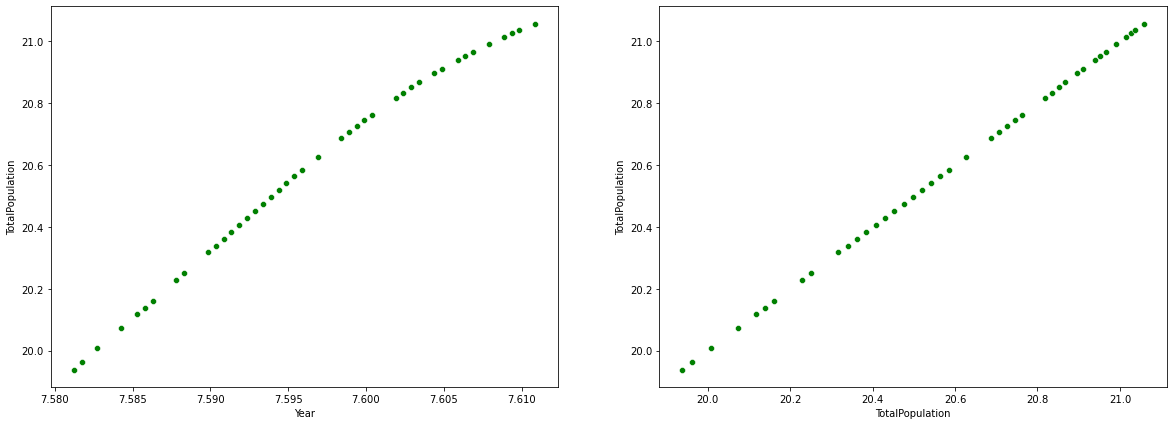

In [310]:


# setup figure
fig, ax = plt.subplots(1,2, figsize=(20,7))

for i, var in enumerate(['Year', 'TotalPopulation',]):
  log_var = np.log(df_clean[var])
  # Cleaned data plots
  g= sns.scatterplot(x=log_var, y= np.log(df_clean.TotalPopulation), color='green', ax=ax[i]);
  



###  Linear Regression Model

In [177]:
# input the data for this linear regression model

# train the model
x_train= train[['Year', 'TotalPopulation']]
y_train= train['Life expectancy at birth, total (years)']

x_test= test[['Year', 'TotalPopulation']]
y_test= test['Life expectancy at birth, total (years)']


In [178]:
# Building the Regression model

model= linear_model.LinearRegression()

# fit the model using .fit method
model.fit(x_train, y_train)

LinearRegression()

In [179]:
# Do predictions on test set

# predict the train dataset
train_predicted= model.predict(x_train)

# predict the test dataset
test_predicted= model.predict(x_test)

In [314]:
# Score

score_lr = model.score(x_test, y_test)
score_lr

0.9985286992110809

In [180]:
# enhanced code readability
print('                                       Training Data')
print('')

# printing the mse and rmse for the training data
print('mean squared error of training data:', mean_squared_error(y_train, train_predicted))
print('root mean squared error of training data:', np.sqrt(mean_squared_error(y_train, train_predicted)))
print('r square:', r2_score(y_train, train_predicted))

                                       Training Data

mean squared error of training data: 0.14744082007618323
root mean squared error of training data: 0.383980233965478
r square: 0.9976072871361051


In [181]:
# enhanced code readability
print('                                       Testing Data')
print('')

# printing the mse and rmse for the testing data
print('mean squared error of testing data:', mean_squared_error(y_test, test_predicted))
print('root mean squared error of testing data:', np.sqrt(mean_squared_error(y_test, test_predicted)))
print('r square:', r2_score(y_test, test_predicted))

                                       Testing Data

mean squared error of testing data: 0.12771755532514145
root mean squared error of testing data: 0.3573759299745038
r square: 0.9985286992110809


### Linear regression with log transformation

In [182]:
# Log transformation
x_log = np.log(x_train)
y_log = np.log(y_train)

# Instance and fit
lr_model = LinearRegression().fit(x_train, y_train)

# Score
score_lr = lr_model.score(x_test, y_test)
score_lr

0.9985286992110809

In [187]:
# Instance and fit
lrLog_model = LinearRegression().fit(x_log, y_log)


# Remove zeroes
x_test_log = x_test[(x_test > 0) & (x_test > 0) & (x_test > 0) ]
y_test_log = y_test[x_test_log.index]

# Log Transform X_test and y test
x_test_log = np.log(x_test_log)
y_test_log = np.log(y_test_log)

# Score
score_log = lrLog_model.score(x_test_log, y_test_log)
score_log

0.9916794276132941

In [189]:
# Predictions
preds = lrLog_model.predict(x_test_log)

# Performance
pd.DataFrame({ 'True Value': np.exp(y_test_log),
               'Prediction': np.exp(preds)}).head(5)

,True Value,Prediction
0,41.13,42.769245
5,44.20,45.060571
46,64.72,65.471184
31,58.15,58.375946
13,49.37,48.745728


# KNN MODEL

In [190]:
# a look at the data_frame
# shape of the data_frame

data_frame

,Year,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)",TotalPopulation,Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57
...,...,...,...,...,...,...,...,...,...,...,...
56,2016,2.290000e+12,1733,8.26,20.92,19.16,3.620000e+11,4.95,1338636340,1.19,68.67
57,2017,2.650000e+12,1981,6.80,21.95,18.79,4.130000e+11,3.33,1354195680,1.16,68.97
58,2018,2.700000e+12,1997,6.53,23.69,19.93,3.990000e+11,3.94,1369003306,1.09,69.27
59,2019,2.830000e+12,2101,4.04,21.27,18.69,4.630000e+11,3.73,1383112050,1.03,69.50


In [191]:
# splitting the dataset into 30% test size with random_state 42
# Only a subset of the available data is used for training
# Only a subset of the available data is used for testing

train, test= train_test_split(data_frame, test_size=0.3, random_state=42)

In [193]:
# training the model for knn



# Create and training a KNN model
clf = KNeighborsRegressor(n_neighbors = 5)

#fitting the model using clf.fit(xtrain, ytrain)
clf.fit(x_train, y_train)

# score
score_knn = clf.score(x_test, y_test)
score_knn

0.9928478138707791

In [194]:
# Predictions
preds = clf.predict(x_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                            'Prediction': preds,
                            'Error': y_test - preds})
# View
performance

,True Value,Prediction,Error
0,41.13,43.974,-2.844
5,44.20,43.974,0.226
46,64.72,64.474,0.246
31,58.15,57.298,0.852
13,49.37,48.570,0.800
55,68.37,68.460,-0.090
34,59.59,59.576,0.014
49,65.98,66.254,-0.274
12,48.72,48.570,0.150
40,62.28,62.188,0.092


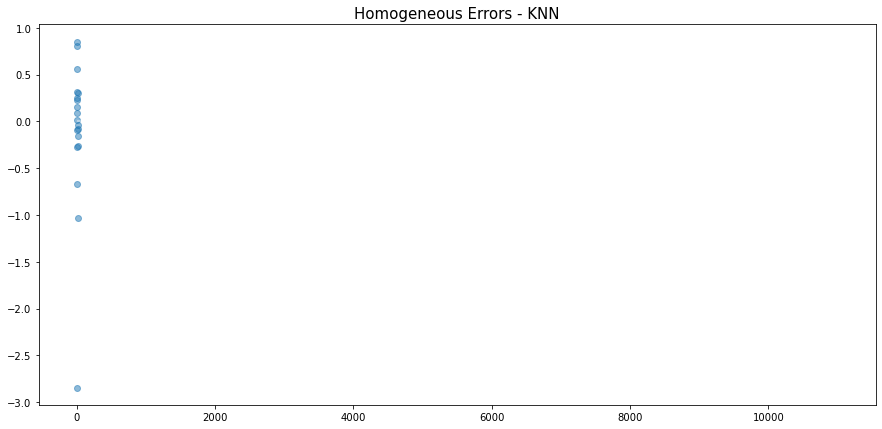

In [195]:
# model evaluation

plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
yerr= performance['Error']

plt.scatter(range(len(yerr)), yerr, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=15);
plt.hlines(y=0, xmin=0, xmax=11000, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

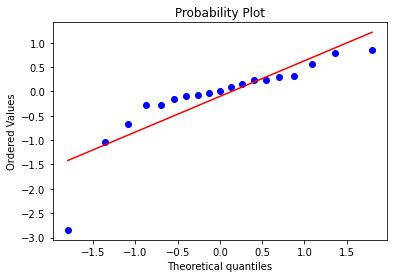

In [196]:


from scipy.stats import probplot
#QQ Plot
probplot(yerr, dist='norm', plot=plt);



Analysis: The model presents some outliers, but most of the predictions are good. It should be enhanced with a little more clenup in the data, though.

In [199]:


# Predictions
preds = lrLog_model.predict(x_test_log)

# Performance
LR_log_performance = pd.DataFrame({ 'True Value': np.exp(y_test_log),
                                   'Prediction': np.exp(preds),
                                   'Error': np.exp(y_test_log) - np.exp(preds)})



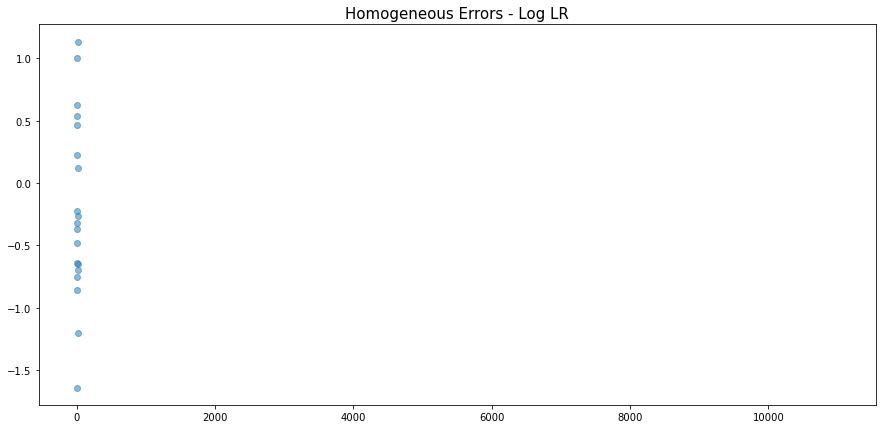

In [200]:
plt.figure(figsize=(15,7))
# Errors
ax_x= LR_log_performance['True Value']
ax_y= LR_log_performance['Prediction']
yerr= LR_log_performance['Error']

plt.scatter(range(len(yerr)), yerr, alpha=.5)
plt.title('Homogeneous Errors - Log LR', size=15);
plt.hlines(y=0, xmin=0, xmax=11000, linestyle='--', color='white', alpha=.5);
#plt.ylim(-.3, .3);

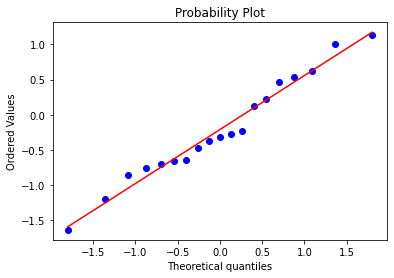

In [201]:


# QQ Plot
probplot(yerr, dist='norm', plot=plt);



Analysis: The model with Log transformation also has a couple of wrong predictions too on the lower side, but it looks even better than the KNN model.

### Model Comparision

In [203]:
# comparing models

pd.DataFrame({'Linear Regression':[score_lr],
              'Log_Linear Regression': [score_log],
              'KNN Regression': [score_knn]})



,Linear Regression,Log_Linear Regression,KNN Regression
0,0.998529,0.991679,0.992848


Analysis: 
    
    By comparing the models we can see the differences in the scores for all three models. All models report a high score.

#   Thank you!